## Naïve Bayes in Python with Labeled Text Data

### Introduction
In this page, I will apply Multinomial Naïve Bayes model to the clean, labeled text data using sklearn package. The reason why I chose to use Multinomial Naïve Bayes is because it is suitable for word count frequency analysis due to its discrete feature. The code of applying and training the model is also included in this page.

In [2]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.model_selection import train_test_split

### Data Preparation
The text data used for Multinomial Naïve Bayes model are Twitter responses (Tweets) that were pulled from Twitter using Twitter API in the data gathering section. The Tweets content were cleaned, and labeled as either "neutral", "positive", or "negative" based on the sentiment analysis compound score of the Tweet text. A snapshot of the clean, labeled text data can be found below:

In [3]:
# import cleaned text data file as pandas DataFrame
tweets_df = pd.read_csv("../../data/01-modified-data/tweetEN_clean.csv")
tweets_df.head()

,author_id,id,created_at,text,clean_text,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,sentiment,label
0,1116548763168858112,1575191634026717184,2022-09-28T18:32:05.000Z,RT @VSkirbekk: Gradual convergence in fertilit...,gradual convergence fertility between china we...,"['gradual', 'convergence', 'fertility', 'betwe...","['gradual', 'convergence', 'fertility', 'china...","['gradual', 'converg', 'fertil', 'china', 'wes...","['gradual', 'convergence', 'fertility', 'china...",0.0000,neutral
1,1364997075851599873,1575190110920114178,2022-09-28T18:26:02.000Z,RT @nytimes: South Korea has had the world's l...,south korea world lowest total fertility rate ...,"['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...",0.2415,positive
2,1231317688288468994,1575189759550693377,2022-09-28T18:24:38.000Z,RT @nytimes: South Korea has had the world's l...,south korea world lowest total fertility rate ...,"['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...",0.2415,positive
3,780710885186674688,1575188100078133248,2022-09-28T18:18:03.000Z,RT @nytimes: South Korea has had the world's l...,south korea world lowest total fertility rate ...,"['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...","['south', 'korea', 'world', 'lowest', 'total',...",0.2415,positive
4,178464094,1575186284808531969,2022-09-28T18:10:50.000Z,RT @koryodynasty: Always trust men to come up ...,always trust come with policies women this cas...,"['always', 'trust', 'come', 'with', 'policies'...","['always', 'trust', 'come', 'policies', 'women...","['alway', 'trust', 'come', 'polici', 'women', ...","['always', 'trust', 'come', 'policy', 'woman',...",0.7184,positive


For this part, only "author_id", "id", "clean_text", "label" are needed for training the model. Therefore, I created a new DataFrame with only these attributes included.

In [4]:
# create a clean tweets file with necessary attributes
clean_tweets = tweets_df[['author_id', 'id', 'clean_text', 'label']]
clean_tweets.head()

,author_id,id,clean_text,label
0,1116548763168858112,1575191634026717184,gradual convergence fertility between china we...,neutral
1,1364997075851599873,1575190110920114178,south korea world lowest total fertility rate ...,positive
2,1231317688288468994,1575189759550693377,south korea world lowest total fertility rate ...,positive
3,780710885186674688,1575188100078133248,south korea world lowest total fertility rate ...,positive
4,178464094,1575186284808531969,always trust come with policies women this cas...,positive


Import the count vectorizer (word count) data of the Tweet data generated in the previous steps, and then concatenate the label column to the count vectorizer data frame as the last attribute. 

In [7]:
# import the count vectorizer cdv file as pandas DataFrame and add labels
vector_df = pd.read_csv('../../data/01-modified-data/tweetEN_CountVectorizer.csv')
vector_df['label'] = tweets_df[['label']]
vector_df.head()

,ability,able,abortion,abortions,about,above,abroad,abrupt,acclaimed,according,...,yorubas,young,younger,youngness,your,youth,zmianie,zoomers,zuki,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


Input matrix X is the count vectorizer data without the label column. Output matrix y is the label column. 

In [8]:
X =  vector_df.loc[:, vector_df.columns != 'label']
y = vector_df.loc[:, 'label']
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (265, 1670)
Shape of y: (265,)


Partition data into training set and testing set using the 80/20 split method. 

In [53]:
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, random_state = 0)

print('X_train.shape		:', X_train.shape)
print('y_train.shape		:', y_train.shape)
print('X_test.shape		:', X_test.shape)
print('y_test.shape		:', y_test.shape)

X_train.shape		: (212, 1670)
y_train.shape		: (212,)
X_test.shape		: (53, 1670)
y_test.shape		: (53,)


A snapshot of the training and testing data

In [54]:
print('------------------- X_train -------------------')
X_train.head(3)

------------------- X_train -------------------


,ability,able,abortion,abortions,about,above,abroad,abrupt,acclaimed,according,...,yoruba,yorubas,young,younger,youngness,your,youth,zmianie,zoomers,zuki
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
print('------------------- X_test -------------------')
X_test.head(3)

------------------- X_test -------------------


,ability,able,abortion,abortions,about,above,abroad,abrupt,acclaimed,according,...,yoruba,yorubas,young,younger,youngness,your,youth,zmianie,zoomers,zuki
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
print('------------------- y_train -------------------')
y_train.head(3)

------------------- y_train -------------------


196    negative
55     positive
157    negative
Name: label, dtype: object

In [57]:
print('------------------- y_test -------------------')
y_test.head(3)

------------------- y_test -------------------


110    positive
97     positive
83     positive
Name: label, dtype: object

#### Model Training: MultinomilaNB

Train the MultinomilaNB model using training data:

In [58]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Make predictions using the trained MultinomialNB model:

In [59]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

Calculate the accuracy of the model prediction:

In [61]:
from sklearn import metrics

# Training Set
print('-------------------- TRAINING SET ACCURACY CALCULATION -------------------')
print('Accuracy:', 100 * metrics.accuracy_score(y_train, y_train_pred))
# compare prediction of x_train with y_train
train_compare = (y_train_pred == y_train)
print('Number of mislabeled points out of a total 212 points =', np.size(train_compare) - np.count_nonzero(train_compare))
# more detailed comparison
true_train, true_train_count = np.unique(y_train, return_counts=True)
pred_train, pred_train_count = np.unique(y_train_pred, return_counts=True)
print('--- Real Train Data: --- \n', np.asarray((true_train, true_train_count)).T)
print('--- Train Data Prediction: --- \n', np.asarray((pred_train, pred_train_count)).T)

# Testing Set
print('-------------------- TESTING SET ACCURACY CALCULATION -------------------')
print('Accuracy:', 100 * metrics.accuracy_score(y_test, y_test_pred))
# compare prediction of x_test with y_test
test_compare = (y_test_pred == y_test)
print('Number of mislabeled points out of a total 53 points =', np.size(test_compare) - np.count_nonzero(test_compare))
# more detailed comparison
true_test, true_test_count = np.unique(y_test, return_counts=True)
pred_test, pred_test_count = np.unique(y_test_pred, return_counts=True)
print('--- Real Test Data: --- \n', np.asarray((true_test, true_test_count)).T)
print('--- Test Data Prediction: --- \n', np.asarray((pred_test, pred_test_count)).T)

-------------------- TRAINING SET ACCURACY CALCULATION -------------------
Accuracy: 92.45283018867924
Number of mislabeled points out of a total 212 points = 16
--- Real Train Data: --- 
 [['negative' 69]
 ['neutral' 13]
 ['positive' 130]]
--- Train Data Prediction: --- 
 [['negative' '64']
 ['neutral' '7']
 ['positive' '141']]
-------------------- TESTING SET ACCURACY CALCULATION -------------------
Accuracy: 56.60377358490566
Number of mislabeled points out of a total 53 points = 23
--- Real Test Data: --- 
 [['negative' 17]
 ['neutral' 5]
 ['positive' 31]]
--- Test Data Prediction: --- 
 [['negative' '18']
 ['neutral' '4']
 ['positive' '31']]


From the accuracy calculations above, we can see that although the trained MultinomialNB model performed a nice prediction on the training data with around 92.45% accuracy, the prediction accuracy of the testing data was only around 56.60%. Based on the testing data provided, the model only predict 30 out of 53 records correctly. 

#### Visualize fitting results
Confusion Matrix

In [62]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

metrics.confusion_matrix(y_test, y_test_pred)

array([[ 8,  0,  9],
       [ 1,  2,  2],
       [ 9,  2, 20]])

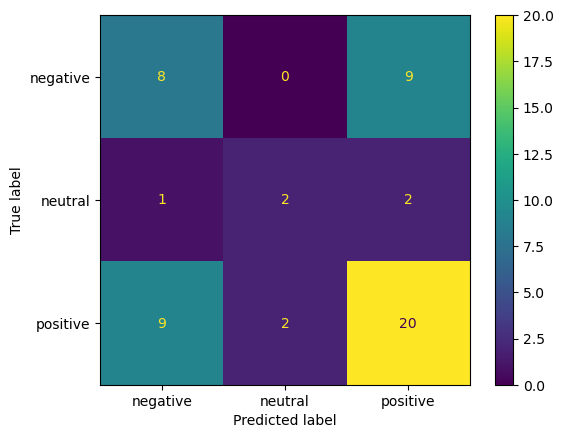

In [43]:
import matplotlib.pyplot as plt
CMP_NB = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.44      0.47      0.46        17
     neutral       0.50      0.40      0.44         5
    positive       0.65      0.65      0.65        31

    accuracy                           0.57        53
   macro avg       0.53      0.51      0.52        53
weighted avg       0.57      0.57      0.57        53



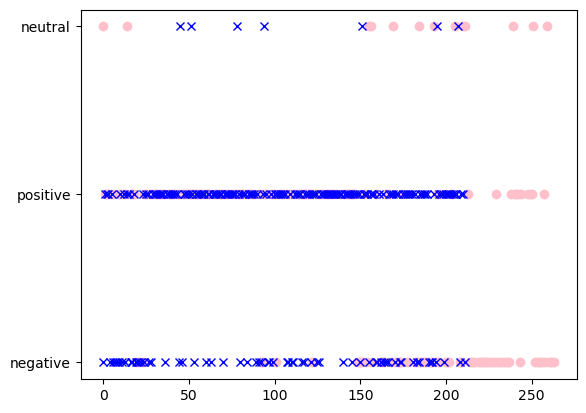

In [74]:
plt.plot(y_train, "o", color='pink')
plt.plot(y_train_pred, "x", color = 'blue')
#plt.plot(y_test, y_test_pred, "o", color='b')

Based on the confusion matrix generated for this multi-class classification task, the classification report, as well as the comparison plot above, we can see the prediction is realtively low on precision, recall, F1-score, indicating that the Multinomial NB model trained using the training data did not do a good job on predicting the testing data. The possible reasons for the low prediction accuracy could be:
1. the size of the text data is very small
2. the data is poorly balanced in terms of the labels
3. the model might be under-fitting or over-fitting